In [32]:
#imported Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
D=pd.read_csv(r"C:\Users\RAHUL PATIL\Downloads\Quote-Equity-CIPLA-EQ-07-10-2023-to-07-10-2024.csv")

In [34]:
D

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,04-Oct-2024,EQ,"1,645.10","1,656.40","1,577.30","1,656.55","1,625.00","1,623.30","1,613.46","1,683.00","1,132.00","23,71,220","3,82,58,68,232.20","1,10,514"
1,03-Oct-2024,EQ,"1,661.25","1,678.00","1,640.35","1,664.85","1,658.00","1,656.55","1,659.10","1,683.00","1,132.00","15,33,472","2,54,41,76,554.55","82,208"
2,01-Oct-2024,EQ,"1,660.00","1,667.05","1,651.55","1,654.10","1,663.95","1,664.85","1,659.48","1,683.00","1,132.00","9,45,740","1,56,94,33,690.60","62,809"
3,30-Sep-2024,EQ,"1,675.00","1,678.90","1,646.30","1,672.50","1,655.00","1,654.10","1,656.81","1,683.00","1,132.00","13,13,437","2,17,61,13,118.85","69,740"
4,27-Sep-2024,EQ,"1,630.15","1,679.05","1,630.00","1,621.80","1,674.50","1,672.50","1,659.12","1,683.00","1,132.00","38,66,952","6,41,57,23,669.20","1,71,020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,13-Oct-2023,EQ,"1,156.00","1,169.20","1,150.00","1,157.90","1,167.80","1,167.75","1,164.97","1,277.90",852.00,"9,40,547","1,09,57,07,800.45","55,605"
243,12-Oct-2023,EQ,"1,179.05","1,186.35","1,152.45","1,171.95","1,159.00","1,157.90","1,161.13","1,277.90",852.00,"25,33,930","2,94,22,14,395.20","94,256"
244,11-Oct-2023,EQ,"1,151.00","1,175.00","1,146.50","1,155.05","1,171.05","1,171.95","1,168.81","1,277.90",852.00,"14,65,239","1,71,25,92,882.55","66,942"
245,10-Oct-2023,EQ,"1,160.10","1,163.60","1,150.50","1,159.50","1,153.65","1,155.05","1,154.56","1,277.90",852.00,"8,22,199","94,92,76,480.25","50,367"


In [35]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           247 non-null    object
 1   series         247 non-null    object
 2   OPEN           247 non-null    object
 3   HIGH           247 non-null    object
 4   LOW            247 non-null    object
 5   PREV. CLOSE    247 non-null    object
 6   ltp            247 non-null    object
 7   close          247 non-null    object
 8   vwap           247 non-null    object
 9   52W H          247 non-null    object
 10  52W L          247 non-null    object
 11  VOLUME         247 non-null    object
 12  VALUE          247 non-null    object
 13  No of trades   247 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [36]:
D.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [38]:
D.count()

Date             247
series           247
OPEN             247
HIGH             247
LOW              247
PREV. CLOSE      247
ltp              247
close            247
vwap             247
52W H            247
52W L            247
VOLUME           247
VALUE            247
No of trades     247
dtype: int64

In [39]:
D.shape

(247, 14)

In [6]:
D.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

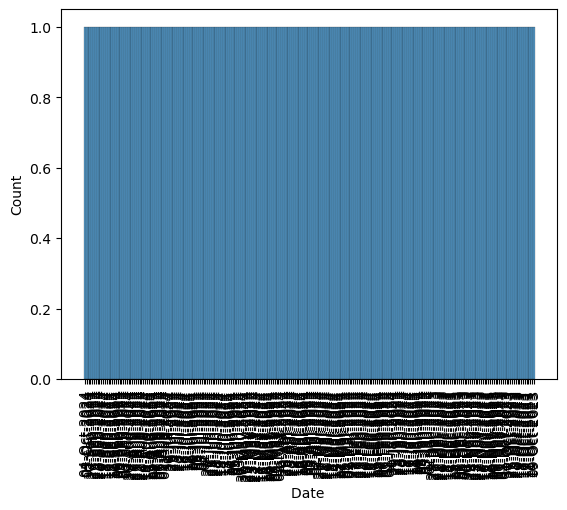

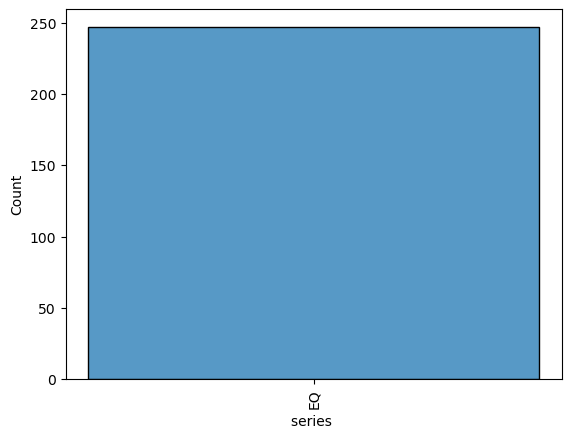

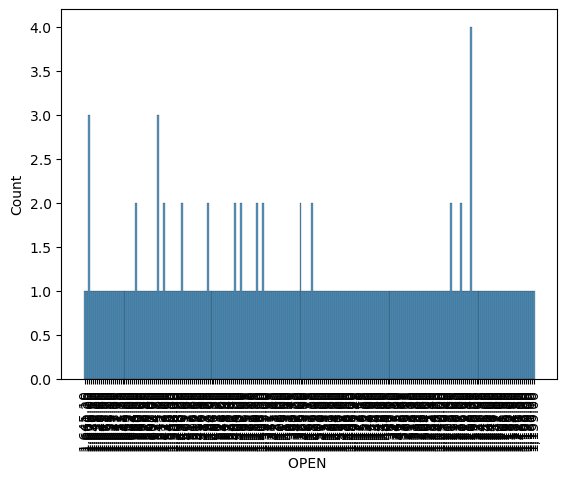

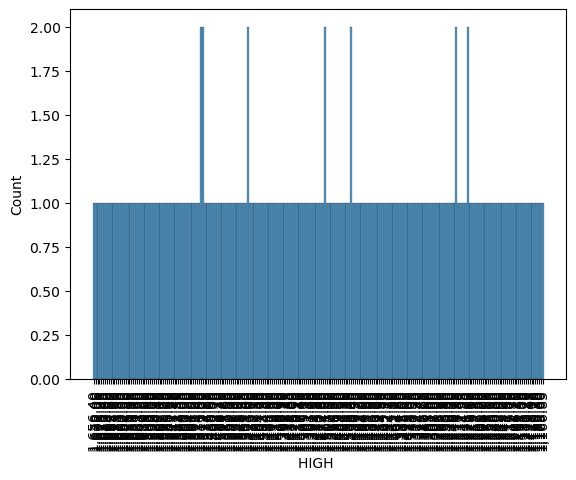

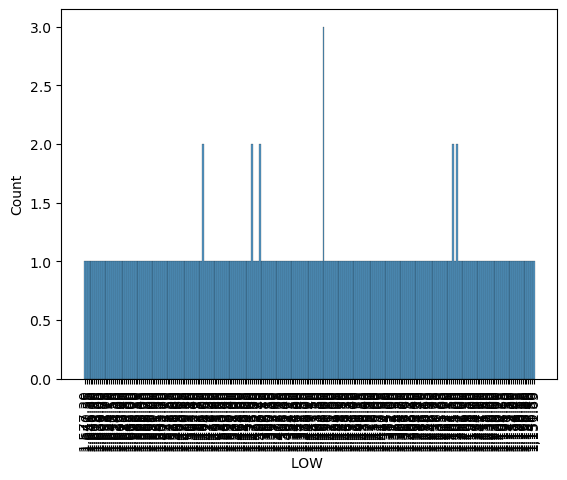

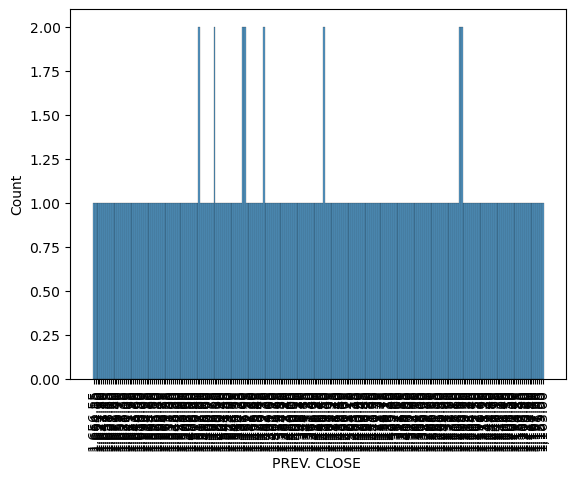

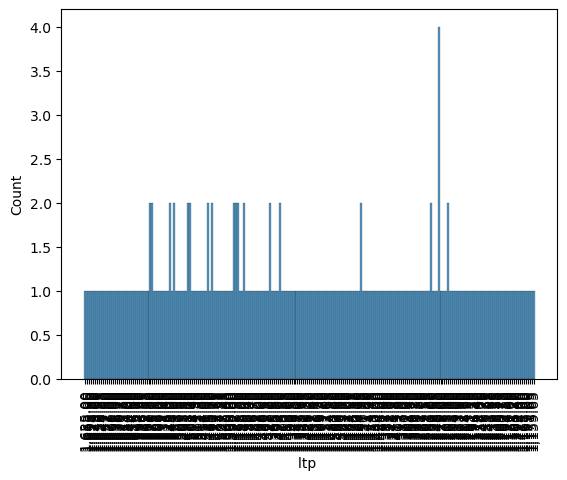

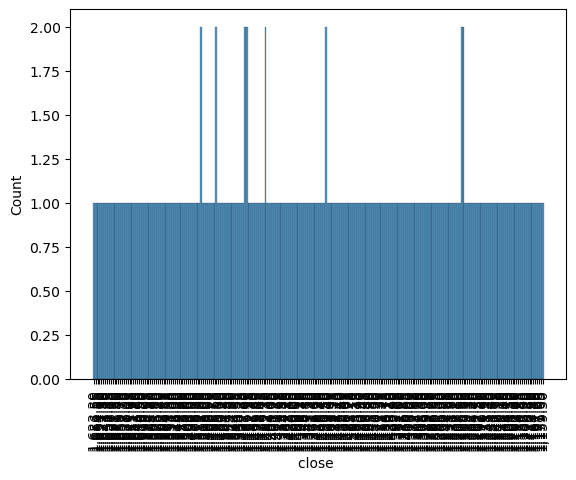

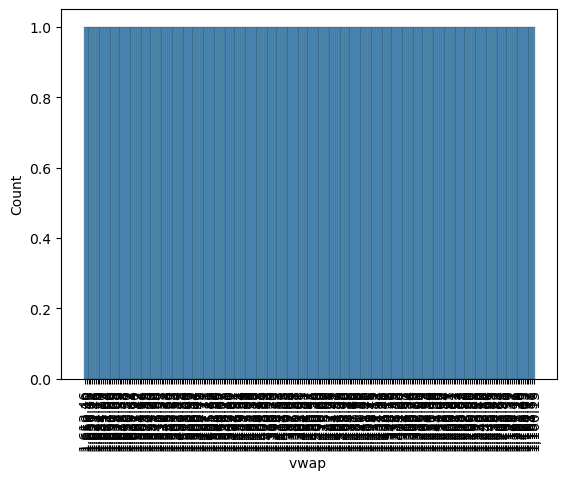

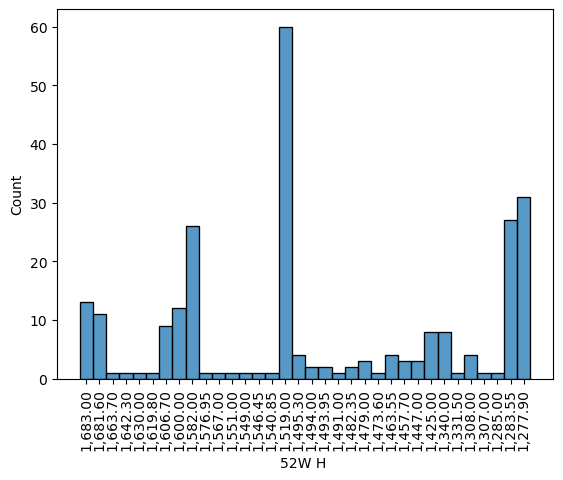

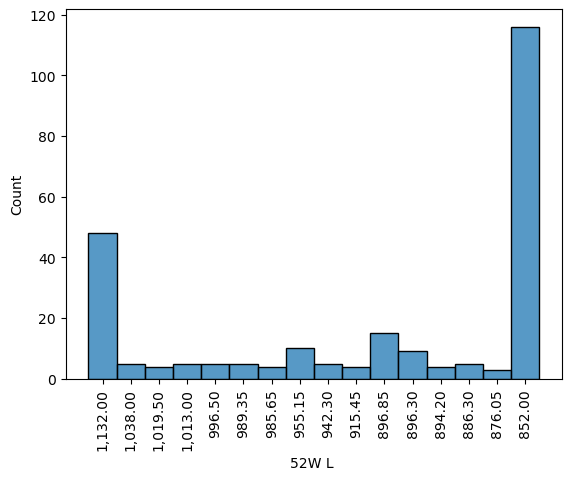

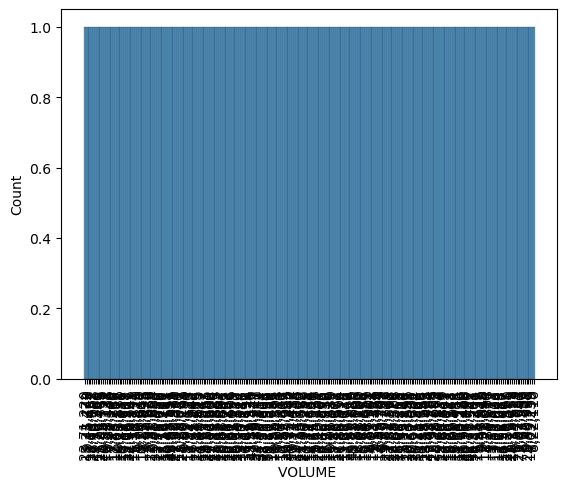

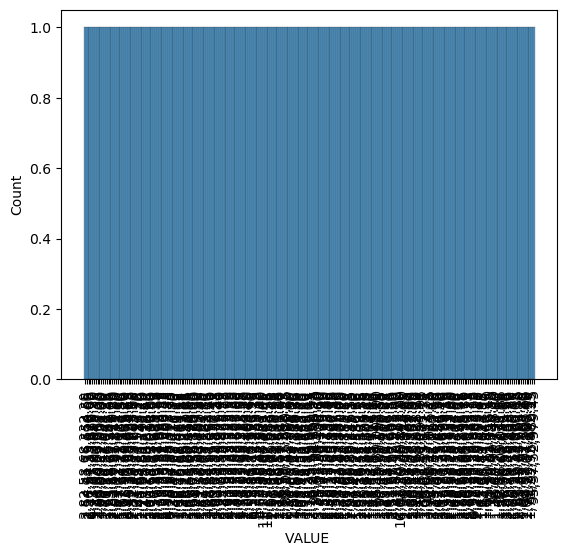

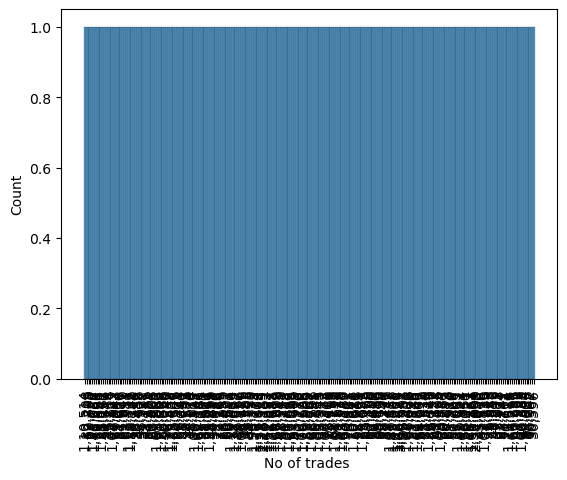

In [62]:
for i in D.columns:
    sns.histplot(D[i])
    plt.xticks(rotation=90)
    plt.show()

In [8]:
D['close ']

0      1,623.30
1      1,656.55
2      1,664.85
3      1,654.10
4      1,672.50
         ...   
242    1,167.75
243    1,157.90
244    1,171.95
245    1,155.05
246    1,159.50
Name: close , Length: 247, dtype: object

In [12]:
D['close '] =D['close '].str.replace(",", "").astype(float)


In [13]:
D= D[['close ']]

scaler = MinMaxScaler(feature_range=(0, 1))#Normalizing the data
scaled_data = scaler.fit_transform(D)

#for  training the data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
X_train, y_train = [], []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

X_train, y_train = np.array(X_train), np.array(y_train)


In [14]:
#data Augmentation
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\RAHUL PATIL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.3093
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0769
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0384
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0122
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0209
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0145
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0136
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0143
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0119
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0097
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0095
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0104
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0118
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0107
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0109
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

In [16]:
test_data = scaled_data[train_size - 60:]
X_test, y_test = [], scaled_data[train_size:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


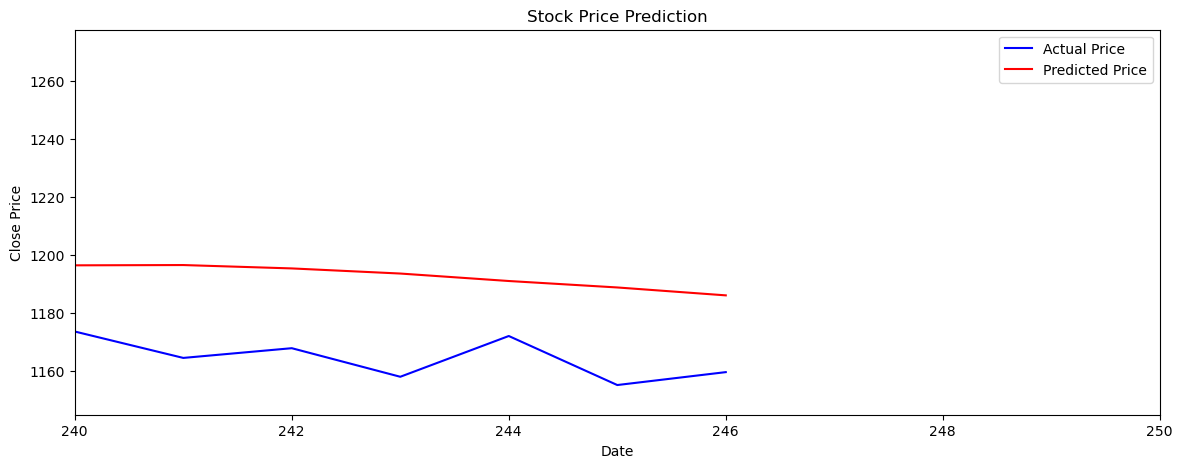

In [17]:
plt.figure(figsize=(14,5))
plt.plot(D.index[train_size:], D['close '][train_size:], color='blue', label='Actual Price')
plt.plot(D.index[train_size:], predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xlim([240,250])
plt.legend()
plt.show()

In [24]:
TT=np.array(scaler.transform(D.loc[:60]))
UU=np.reshape(TT, (TT.shape[0], TT.shape[1], 1))
predictions = model.predict(UU)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [25]:
predictions

array([[1197.384 ],
       [1199.2334],
       [1199.6959],
       [1199.097 ],
       [1200.1224],
       [1197.3007],
       [1198.4902],
       [1198.1759],
       [1199.3226],
       [1198.237 ],
       [1198.1842],
       [1198.9579],
       [1200.0834],
       [1199.3922],
       [1199.4089],
       [1199.2725],
       [1197.6646],
       [1197.8673],
       [1197.2091],
       [1196.704 ],
       [1197.6312],
       [1198.9745],
       [1199.0469],
       [1198.6823],
       [1199.1415],
       [1197.1202],
       [1197.1008],
       [1195.9833],
       [1195.7561],
       [1194.6826],
       [1195.3049],
       [1195.7921],
       [1194.0363],
       [1194.7352],
       [1194.7683],
       [1194.0887],
       [1195.1748],
       [1195.3298],
       [1194.6936],
       [1194.4283],
       [1193.523 ],
       [1192.33  ],
       [1191.4036],
       [1192.1594],
       [1193.1177],
       [1193.013 ],
       [1192.1649],
       [1193.5449],
       [1194.7074],
       [1190.5802],
